In [89]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model
%matplotlib inline

In [22]:
df = pd.read_csv("HR_comma_sep.csv")
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [23]:
df.shape

(14999, 10)

In [59]:
salaries_left = {"low": 0, "medium": 0, "high": 0}

for left, salary in zip(df.left, df.salary):
    if left == 1:
        salaries_left[salary] += 1

In [65]:
x = list(salaries_left.keys())
y = list(salaries_left.values())

<BarContainer object of 3 artists>

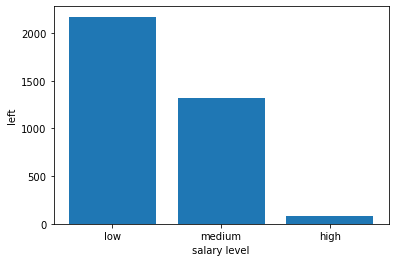

In [71]:
plt.xlabel("salary level")
plt.ylabel("left")
plt.bar(x, y)

In [75]:
dept_left = {}

for left, dept in zip(df.left, df.Department):
    if left == 0:
        continue
    if dept_left.get(dept) == None:
        dept_left[dept] = 1
    else:
        dept_left[dept] += 1

In [77]:
x = list(dept_left.keys())
y = list(dept_left.values())

<BarContainer object of 10 artists>

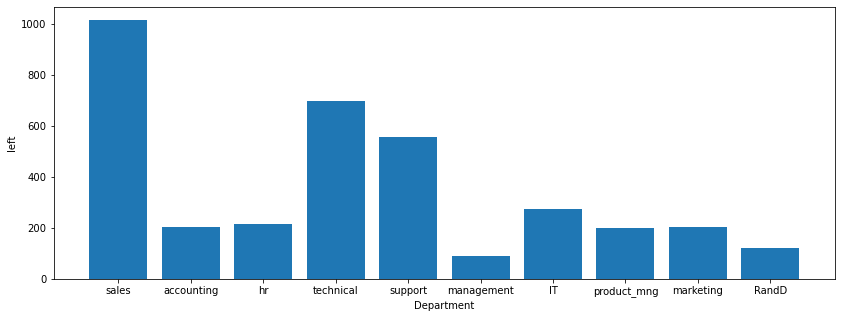

In [86]:
plt.figure(figsize=(14,5))
plt.xlabel("Department")
plt.ylabel("left")
plt.bar(x, y)

**mapping salary this way is a big factor as to why my accuracly is low. I should have used one hot encoding w/ dummy variables instead"

In [119]:
df.salary = df.salary.replace(to_replace=["low", "medium", "high"], value=[0,1,2])

In [123]:
dept_map = {}

for i, dept in enumerate(dept_left.keys()):
    dept_map[dept] = i

{'sales': 0,
 'accounting': 1,
 'hr': 2,
 'technical': 3,
 'support': 4,
 'management': 5,
 'IT': 6,
 'product_mng': 7,
 'marketing': 8,
 'RandD': 9}

In [179]:
df.Department = df.Department.replace(to_replace=list(dept_map.keys()), value=list(dept_map.values()))

In [180]:
model = linear_model.LogisticRegression(max_iter=300)

In [181]:
from sklearn.model_selection import train_test_split

In [182]:
X = df.drop(columns="left")
y = df.left
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [183]:
X_train.shape

(13499, 9)

In [184]:
X_test.shape

(1500, 9)

In [185]:
y_train.shape

(13499,)

In [186]:
y_test.shape

(1500,)

In [189]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=300)

In [193]:
model.score(X_train, y_train)

0.7914660345210757

In [195]:
model.score(X_test, y_test)

0.8046666666666666